<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [61]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context
Доклад о мировом счастье-это знаковый обзор состояния глобального счастья, который ранжирует 156 стран по тому, насколько счастливыми их граждане считают себя. В докладе о мировом счастье этого года основное внимание уделяется счастью и обществу: как счастье развивалось за последние десять лет, с акцентом на технологии, социальные нормы, конфликты и государственную политику, которые привели к этим изменениям.


*  **Country (region)** Name of the country.
*  **Ladder** Лестница кантрил-это мера удовлетворенности жизнью..
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** Степень, в которой щедрость способствовала подсчету балла счастья.
*  **Log of GDP per capita** Степень, в которой ВВП вносит свой вклад в расчет показателя счастья
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [71]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

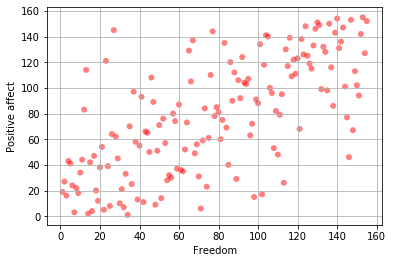

In [63]:
# Выборка - некоторая случайная величина Freedom и positive affect

freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.5, edgecolors='none')
ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [64]:
# **Выбросы** (в каждой выборке отсутствует по одному значению)
print(freedom.isnull().sum())
print(positive_affect.isnull().sum())

1
1


In [65]:
# строка в которой отсутствует значение параметра Freedom
df.loc[df['Freedom'].isnull() == True]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [66]:
# удалим эту строку (оставим те строки, в которых Ladder не равен 29)

df = df.loc[df['Ladder'] != 29, :]

In [67]:
# объем данных стал на одну строчку меньше
len(df)

155

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [98]:
#..............Cреднее значение
#Складываем все значения выборки и делим на количество элементов в выборке
print('Среднее для Freedom (метод 1)= ',statistics.mean(df['Freedom']))
print('Среднее для Freedom (метод 2)= ', sum(df['Freedom'])/len(df['Freedom']))

Среднее для Freedom (метод 1)=  78.0
Среднее для Freedom (метод 2)=  78.0


In [100]:
# ..................Медиана
#  это такое значение, что ровно половина выборки меньше него, а другая половина - больше.

# Извлекаем Freedom 
freedom = df['Freedom']

# Находим их количество
num_freedom = len(freedom)

# Сортируем в порядке возрастания
sorted_freedom = sorted(freedom)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]
# Находим медиану
print('Медиана (метод 1) : ', result)

Медиана (метод 1) :  78.0


In [102]:
import statistics
print('Медиана (метод 2) : ', statistics.median(df['Freedom']))

Медиана (метод 2) :  78.0


Почему нельзя найти моду?

In [82]:
#................ Мода - значение, которое наиболее часто встречается в выборке
# print('Значение моды: ', statistics.mode(freedom))
# StatisticsError: no unique mode; found 155 equally common values
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1
# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
if maxp != 1: 
    print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)
else:
    print('Все значения встречаются одинаковое количество раз - по одному разу.\nПоэтому моды нет')


Все значения встречаются одинаковое количество раз - по одному разу.
Поэтому моды нет


In [96]:
#................Стандартное отклонение
# Мера разброса данных (насколько данные варьируются от среднего значения) - 
#                                                    корень среднего квадратичного отклонения.
#        Первый метод:
print('Стандартное отклонение для freedom (метод 1) = ',statistics.pstdev(freedom))
#        Второй метод:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print('Стандартное отклонение для freedom (метод 2) = ',stdev(freedom))

Стандартное отклонение для freedom (метод 1) =  44.74371464239419
Стандартное отклонение для freedom (метод 2) =  44.88875137492688


In [95]:
#....................Дисперсия
# Дисперсия - квадрат стандартного отклонения
print(statistics.pvariance(freedom))
print(44.74371464239419**2)

2002.0
2002.0


In [108]:
#....................Размах
# Разница между минимальным и максимальным значениями

freedom_range = max(freedom) - min(freedom)
print('max =',max(freedom),'   min =',min(freedom),'   размах для Freedom =',freedom_range)

max = 155.0    min = 1.0    размах для Freedom = 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

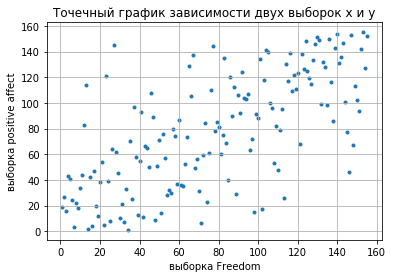

In [110]:
#.....................Коррелляция
# Взаимосвязь двух выборок друг от друга. 
# Чтобы графически увидеть взаимосвязь двух переменных, 
# необходимо построить точечный график зависимости друг от друга. 
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [113]:
#.....................Корелляция Пирсона
# 
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [114]:
# Нормализация значений

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0
0  0.025974
1  0.032468
2  0.012987
3  0.038961
4  0.116883


Построить матрицу корреляций для всех колонок таблицы

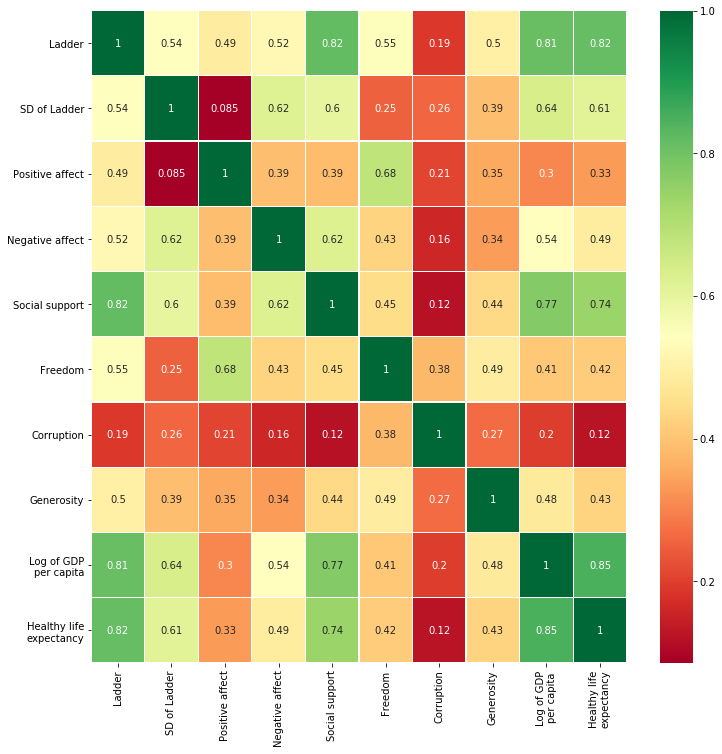

In [115]:
#.....................Матрица корреляций

import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [0]:
корреляция между некоторыми атрибутами (характеристиками) объясняется тем, что при изменении 
одного атрибута происходит закономерное изменение другого атрибута.
Важно понимать, что корреляционная завистимость отражает только линейную 
стохастическую взаимосвязь  между атрибутами и не говорит о причинно-следственных связях.

Загрузить таблицу цен на авокадо: 

In [118]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?
----распределение похоже на нормальное----

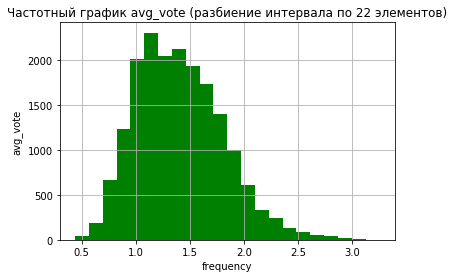

In [122]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 22, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 22 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [125]:
#.....................Корелляция Пирсона
# 
from scipy.stats import pearsonr
average_price = df['AveragePrice']
a4046 = df['4046']
a4225 = df['4225']
a4770 = df['4770']
corr, p_value = pearsonr(a4046, average_price)
print('Коэффициент корреляции Пирсона для [a4046, average_price]:', corr)
corr, p_value = pearsonr(a4225, average_price)
print('Коэффициент корреляции Пирсона для [a4225, average_price]:', corr)
corr, p_value = pearsonr(a4770, average_price)
print('Коэффициент корреляции Пирсона для [a4770, average_price]:', corr)
corr, p_value = pearsonr(a4046, a4770)
print('Коэффициент корреляции Пирсона для [a4046, a4770)]:', corr)
corr, p_value = pearsonr(a4046, a4225)
print('Коэффициент корреляции Пирсона для [a4046, a4225]:', corr)
corr, p_value = pearsonr(a4770, a4225)
print('Коэффициент корреляции Пирсона для [a4770, a4225]:', corr)

Коэффициент корреляции Пирсона для [a4046, average_price]: -0.2083170484878848
Коэффициент корреляции Пирсона для [a4225, average_price]: -0.17292777250933541
Коэффициент корреляции Пирсона для [a4770, average_price]: -0.1794459839797562
Коэффициент корреляции Пирсона для [a4046, a4770)]: 0.8333891041719167
Коэффициент корреляции Пирсона для [a4046, a4225]: 0.9261099558992296
Коэффициент корреляции Пирсона для [a4770, a4225]: 0.8878549976059532


сильная прямая связь между: a4046, a4770, a4225
слабая обратная связь между average_price и a4046, a4770, a4225

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [4]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [5]:
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [6]:
len(df)

18249

In [9]:
# Нормализация значений

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print('Цена (нормализованные значения): ',df_norm[:5])

Цена (нормализованные значения):            0
0  0.316726
1  0.323843
2  0.174377
3  0.227758
4  0.298932


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
PREDICTION_TYPE = 'organic'
df_org = df[df.type == PREDICTION_TYPE]

In [16]:
# сколько регионов в выборке
regions = df_org.groupby(df_org.region)
print("Всего регионов в выборке (organic):", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Всего регионов в выборке (organic): 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLoui

In [15]:
# У нас есть задание проанализировать рынок для определенного региона: LasVegas.
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

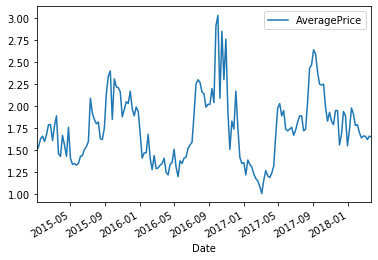

In [17]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

Итак, у нас есть исторические данные, и мы хотим предсказать на их основе, 
как будет меняться цена в будущем. Для этого можно использовать разные методы. 
Допустим, мы хотим реализовать имеющийся инструмент - Prophet
Во-первых, переименуем столбцы как того требует prophet.

In [18]:
# переименовали данные 'Date'  в   'ds' и тд
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [19]:
# Во-вторых, разделим данные на 80% тренировочных и на 20% тестовых:
date_price = date_price.sort_values(by='ds')
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]

In [20]:
train_price.head()

,ds,y
51,2015-01-04,1.50
50,2015-01-11,1.54
49,2015-01-18,1.63
48,2015-01-25,1.66
47,2015-02-01,1.60


In [21]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [22]:
test_price.head()

,ds,y
125,2017-08-06,1.74
124,2017-08-13,2.05
123,2017-08-20,2.43
122,2017-08-27,2.47
121,2017-09-03,2.64


In [23]:
test_price.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


In [25]:
# В-третьих:  обучим модель
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Сделаем предсказания для тестового периода:
Посчитаем, насколько дней вперед надо сделать предсказания

In [26]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [27]:
test_price.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


Последний день тренировочных данных - это 30 июля 2017. 
Последний день тестовых данных - это 25 марта 2018. 
Нам нужно сделать предсказания на примерно 240 дней вперед.

In [28]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [30]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784346,1.229938,1.784247,1.784346,1.784346,-0.279689,-0.279689,-0.279689,-0.279689,-0.279689,-0.279689,0.0,0.0,0.0,1.504657
1,2015-01-11,1.783778,1.196862,1.764596,1.783778,1.783778,-0.285370,-0.285370,-0.285370,-0.285370,-0.285370,-0.285370,0.0,0.0,0.0,1.498408
2,2015-01-18,1.783211,1.215256,1.797011,1.783211,1.783211,-0.278175,-0.278175,-0.278175,-0.278175,-0.278175,-0.278175,0.0,0.0,0.0,1.505035
3,2015-01-25,1.782643,1.217902,1.805368,1.782643,1.782643,-0.275927,-0.275927,-0.275927,-0.275927,-0.275927,-0.275927,0.0,0.0,0.0,1.506716
4,2015-02-01,1.782075,1.228269,1.804093,1.782075,1.782075,-0.276166,-0.276166,-0.276166,-0.276166,-0.276166,-0.276166,0.0,0.0,0.0,1.505909


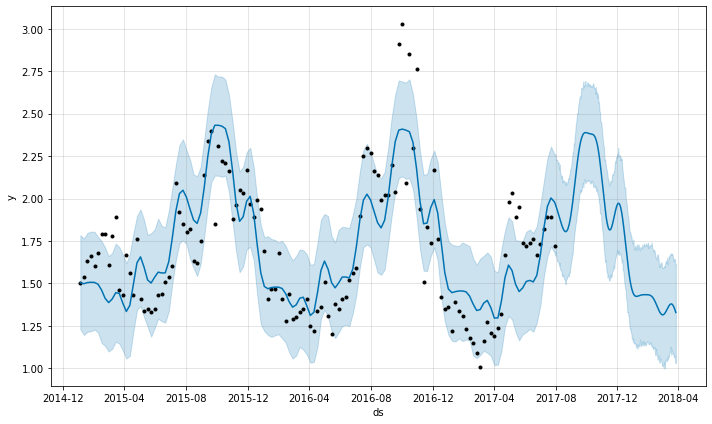

In [31]:
fig1 = m.plot(forecast)

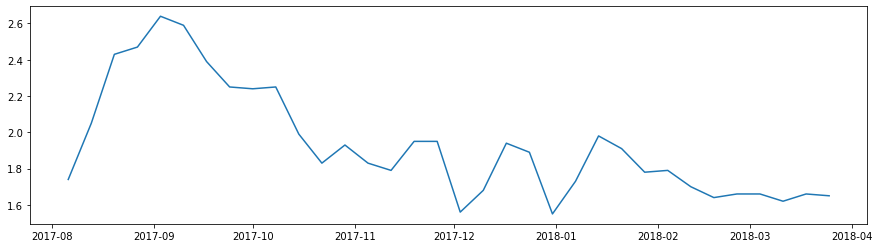

In [32]:
# Сравним с тем, что было на самом деле в этот период:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

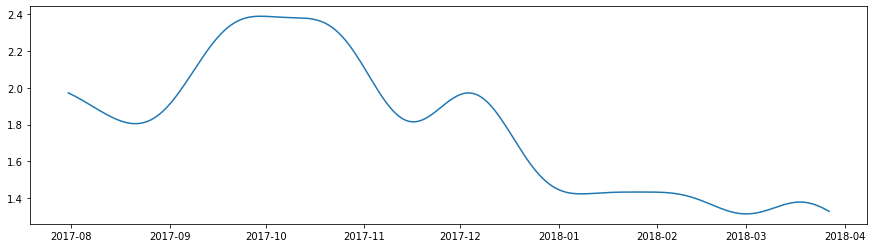

In [33]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

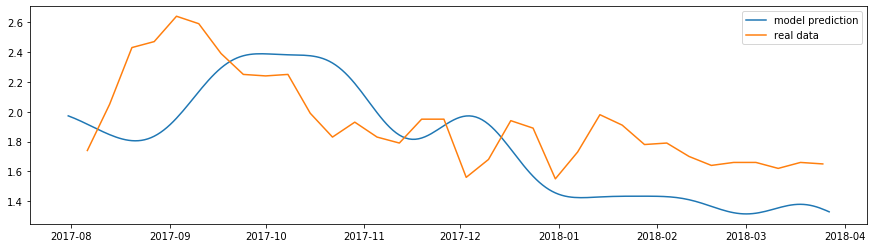

In [34]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.legend(['model prediction', 'real data'])
plt.show()

In [ ]:
# Модель не совсем точна, но есть некая корреляция между данными.